In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import os
from sklearn.metrics import f1_score
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from datetime import datetime
from xgboost import XGBClassifier

In [172]:
# Путь к директории с данными

data_dir = '../00_data/track_1/'
sumbit_dir = '../02_submits/'
preprocessed_dir = '../03_preprocessed_data/'

X_train = pd.read_csv(preprocessed_dir + 'X_train.csv')
X_test = pd.read_csv(preprocessed_dir + 'X_test.csv')
y_train = pd.read_csv(preprocessed_dir + 'y_train.csv')
y_test  = pd.read_csv(preprocessed_dir + 'y_test.csv')
unused_features = [ 'is_test']
cat_col = ['1_max_water_code', 
           '2_max_water_code',
           '6_max_water_code',
           '7_max_water_code',
           '9_max_water_code',
           '10_max_water_code',
           '11_max_water_code',
           '12_max_water_code',
           '1_min_water_code',
           '2_min_water_code',
           '6_min_water_code',
           '7_max_water_code',
           '9_min_water_code',
           '10_min_water_code',
           '11_min_water_code',
           '12_min_water_code'
          ]
unused_features = unused_features + cat_col

C:\Users\omore\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (40,58,110,128,180,390,548,600,618) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\omore\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (40,58,110,128,180,250,548,600,618) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Random Forest

In [174]:
mod_RF = RandomForestClassifier(class_weight = 'balanced')
mod_RF.fit(X_train.drop(unused_features, axis = 1), y_train)        

y_pred = mod_RF.predict(X_test.drop(unused_features, axis = 1))
y_train_pred = mod_RF.predict(X_train.drop(unused_features, axis = 1))

print('F1-train: {}'.format(f1_score(y_train, y_train_pred)))
print('F1-test: {}'.format(f1_score(y_test, y_pred)))

C:\Users\omore\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


F1-train: 1.0
F1-test: 0.0


Text(0.5, 0, 'Random Forest Feature Importance')

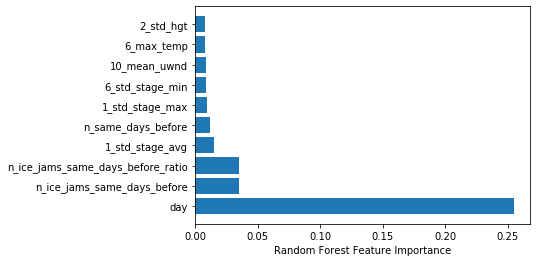

In [175]:
importances = mod_RF.feature_importances_
feature_names = X_train.drop(unused_features, axis = 1).columns
sorted_idx = importances.argsort()[::-1]


plt.barh(feature_names[sorted_idx][0:10], importances[sorted_idx][0:10])
plt.xlabel("Random Forest Feature Importance")


In [176]:
mod_RF = RandomForestClassifier() # or GradientBoostingClassifier, or XGBoostClassifier

search_grid_RF = {'bootstrap': [True],
                  'max_depth': [2, 3, 4, 5, 6],
                  'max_features': [3, 4, 5, 6],
                  'n_estimators': [5, 10, 20, 50],
                  'min_samples_leaf': [10, 25, 50],
                  'min_samples_split': [25, 50],
                  'random_state': [29],
                  'class_weight': ['balanced']
                  }

param_search_RF = GridSearchCV(estimator=mod_RF, 
                               param_grid=search_grid_RF, 
                               scoring=metrics.make_scorer(metrics.f1_score),
                               cv=3, 
                               n_jobs=-1, 
                               verbose=2, return_train_score=True,
                               iid=True)

param_search_RF.fit(X_train.drop(unused_features, axis = 1), y_train)        

print(param_search_RF.best_params_)

mod_opt_RF = RandomForestClassifier(**param_search_RF.best_params_)
mod_opt_RF = mod_opt_RF.fit(X_train.drop(unused_features, axis = 1), y_train)

y_pred = mod_opt_RF.predict(X_test.drop(unused_features, axis = 1))
y_train_pred = mod_opt_RF.predict(X_train.drop(unused_features, axis = 1))

threshold_RF = 0.3
print('F1-train: {}'.format(f1_score(y_train, y_train_pred)))
print('F1-test: {}'.format(f1_score(y_test, y_pred)))

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.4min finished
C:\Users\omore\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\Users\omore\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 25, 'n_estimators': 20, 'random_state': 29}


C:\Users\omore\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


F1-train: 0.10915818686401481
F1-test: 0.0


In [ ]:
plot_confusion_matrix(mod_opt_RF, X_test.drop(unused_features, axis = 1), y_test)

In [ ]:
plot_confusion_matrix(mod_opt_RF, X_train.drop(unused_features, axis = 1), y_train)

In [ ]:
importances = mod_opt_RF.feature_importances_
feature_names = X_train.drop(unused_features, axis = 1).columns
sorted_idx = importances.argsort()[::-1][0:10]


plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


## Retrain the model on all data

In [ ]:
all_train = X[(X['is_test'] == False)].drop('ice_jam', axis = 1).reset_index(drop=True).dropna()
X_val = X[(X['is_test'] == True)].drop('ice_jam', axis = 1).reset_index(drop=True).dropna()
all_y_train =  X.loc[(X['is_test'] == False),'ice_jam']
unused_features = ['year', 'is_test']
mod_opt_RF = mod_opt_RF.fit(all_train.drop(unused_features, axis = 1), all_y_train)


In [ ]:
X_val['ice_jam'] = mod_opt_RF.predict(X_val.drop(unused_features, axis = 1))

In [ ]:
now = datetime.now()
X_val[['year', 'station_id', 'day', 'ice_jam']].\
    to_csv(sumbit_dir + 'submit-rf' + now.strftime("%m-%d-%Y-%H-%M") + '.csv', index=False)

### submit

In [ ]:
X.to_csv(preprocessed_dir + 'X-' + now.strftime("%m-%d-%Y-%H-%M") + '.csv', index=False)

# XGBoost

In [33]:
model = XGBClassifier()
eval_set =[(X_test.drop(unused_features, axis = 1), y_test)]
model.fit(X_train.drop(unused_features, axis = 1), 
                     y_train,  eval_metric="error",
                     eval_set=eval_set , verbose=True)   

y_pred = model.predict(X_test.drop(unused_features, axis = 1))
y_train_pred = model.predict(X_train.drop(unused_features, axis = 1))

print('F1-train: {}'.format(f1_score(y_train, y_train_pred)))
print('F1-test: {}'.format(f1_score(y_test, y_pred)))

C:\Users\omore\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\omore\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.01053
[1]	validation_0-error:0.01053
[2]	validation_0-error:0.01053
[3]	validation_0-error:0.01053
[4]	validation_0-error:0.01053
[5]	validation_0-error:0.01053
[6]	validation_0-error:0.01053
[7]	validation_0-error:0.01053
[8]	validation_0-error:0.01053
[9]	validation_0-error:0.01053
[10]	validation_0-error:0.01053
[11]	validation_0-error:0.01053
[12]	validation_0-error:0.01053
[13]	validation_0-error:0.01053
[14]	validation_0-error:0.01053
[15]	validation_0-error:0.01053
[16]	validation_0-error:0.01053
[17]	validation_0-error:0.01053
[18]	validation_0-error:0.01053
[19]	validation_0-error:0.01053
[20]	validation_0-error:0.01053
[21]	validation_0-error:0.01053
[22]	validation_0-error:0.01053
[23]	validation_0-error:0.01053
[24]	validation_0-error:0.01053
[25]	validation_0-error:0.01053
[26]	validation_0-error:0.01053
[27]	validation_0-error:0.01053
[28]	validation_0-error:0.01053
[29]	validation_0-error:0.01053
[30]	validation_0-error:0.01053
[31]	validation_0-

In [ ]:
model.get_params()

In [64]:
search_grid_RF = {'max_depth': [2, 3, 4, 5, 6],
                  'max_features': [3, 4, 5, 6],
                  'n_estimators': [20, 50, 100, 150],
                  'random_state': [29]
                  }



param_search_xgb = GridSearchCV(estimator=model, 
                               param_grid=search_grid_RF, 
                               scoring=metrics.make_scorer(metrics.f1_score),
                               cv=3, 
                               n_jobs=-1, 
                               verbose=2, return_train_score=True,
                               iid=True)
param_search_xgb.fit(X_train.drop(unused_features, axis = 1), 
                     y_train, early_stopping_rounds=10, 
                     eval_set=[(X_test.drop(unused_features, axis = 1),)] , verbose=True)        

print(param_search_xgb.best_params_)
mod_opt_xgb = XGBClassifier(**param_search_xgb.best_params_)
mod_opt_xgb = mod_opt_xgb.fit(X_train.drop(unused_features, axis = 1), y_train)

y_pred = mod_opt_xgb.predict(X_test.drop(unused_features, axis = 1))
y_train_pred = mod_opt_xgb.predict(X_train.drop(unused_features, axis = 1))

threshold_RF = 0.3
print('F1-train: {}'.format(f1_score(y_train, y_train_pred)))
print('F1-test: {}'.format(f1_score(y_test, y_pred)))

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.2s


[0]	validation_0-error:0.01073
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.01073
[2]	validation_0-error:0.01073
[3]	validation_0-error:0.01073
[4]	validation_0-error:0.01073
[5]	validation_0-error:0.01073
[6]	validation_0-error:0.01073
[7]	validation_0-error:0.01073
[8]	validation_0-error:0.01073
[9]	validation_0-error:0.01073
[10]	validation_0-error:0.01073
Stopping. Best iteration:
[0]	validation_0-error:0.01073



[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   20.8s finished
C:\Users\omore\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'max_depth': 2, 'max_features': 3, 'n_estimators': 20, 'random_state': 29}
F1-train: 0.0
F1-test: 0.0


# I stopped here

### Соберем фичи из гидроданных

<div class="alert alert-block alert-warning">
Мы не можем использовать данные из будущего: всё, что происходит после заторного периода, относится уже к следующему году.
</div>

In [75]:
# Внесем не темпоральные данные
X = pd.merge(X, hc[['station_id', 
                                'distance_from_source', 
                                'drainage_area', 
                                'z_null']], on='station_id', how='left')

# Возьмем также данные из ежедневных наблюдений
hld = pd.read_csv(data_dir + 'hydro_1day.csv',
                   parse_dates=['date'])
hld.head(1)

,year,station_id,month,day,date,stage_avg,stage_min,stage_max,temp,water_code,ice_thickness,snow_height,place,discharge
0,2000,3019,1,1,2000-01-01,74.0,74.0,74.0,NaN,46,NaN,NaN,NaN,NaN


In [76]:
X.head()

,year,station_id,day,ice_jam,is_test,ice_jam_same_day_last_year,ice_jam_same_day_prelast_year,is_last_year_missing,is_prelast_year_missing,n_jams_last_year,n_jams_prelast_year,n_jams_past,n_same_days_before,n_ice_jams_same_days_before,n_ice_jams_same_days_before_ratio,distance_from_source,drainage_area,z_null
0,2000,3019,1,0.0,False,0.0,0.0,False,True,0.0,0.0,0.0,14,0.0,0.0,1140.0,92200,249.38
1,2000,3019,2,0.0,False,0.0,0.0,False,True,0.0,0.0,0.0,14,0.0,0.0,1140.0,92200,249.38
2,2000,3019,3,0.0,False,0.0,0.0,False,True,0.0,0.0,0.0,14,0.0,0.0,1140.0,92200,249.38
3,2000,3019,4,0.0,False,0.0,0.0,False,True,0.0,0.0,0.0,14,0.0,0.0,1140.0,92200,249.38
4,2000,3019,5,0.0,False,0.0,0.0,False,True,0.0,0.0,0.0,14,0.0,0.0,1140.0,92200,249.38


In [ ]:
hld['station_id'] = hld.station_id.astype(int)
mld['station_id'] = mld['station_id'].astype(int)

In [ ]:
hld.head()

In [ ]:
mld.head()

In [ ]:
hld = hld.merge(mld, on=['station_id', 'year', 'month', 'day'], how='inner')
hld = hld.fillna(0)
hld.head()

### Скорректируем год, в который доступно наблюдение

In [ ]:
hld.head()

In [ ]:
# Определим для наблюдения год, в который оно доступно

# Маска-окно между заторным периодом и концом года
# true if after jam
# false otherwise
def after_jam_window(row, local=False):
    if local:
        month = row.month_local
        day = row.date_local.day
    else:
        month = row.month
        day = row.date.day
    return (((month == 6) and (day > 3))
            or (month in [7, 8, 9, 10, 11, 12]))

# Год относительно бизнес-логики
def target_year(row, local=False):
    if local:
        year = row.year_local
    else:
        year = row.year
    if after_jam_window(row):
        return year + 1
    else:
        return year
    
hld['target_year'] = hld.apply(target_year, axis=1)

# Календарный год и день больше не нужны
hld.drop(columns=['year', 'date', 'day'], axis=1, inplace=True)

In [ ]:
hld.head()

In [ ]:
# Гидро – сделаем ресэмплинг по месяцу

index = ['station_id', 'month', 'target_year']

hld_mean = hld.groupby(index).mean().add_prefix('mean_').reset_index()
hld_max = hld.groupby(index).max().add_prefix('max_').reset_index()
hld_min = hld.groupby(index).min().add_prefix('min_').reset_index()
hld_std = hld.groupby(index).std().add_prefix('std_').reset_index()
data_frames = [hld_mean, hld_max, hld_min, hld_std]

hydro_monthly = pd.concat(data_frames, axis=1)
hydro_monthly = hydro_monthly.loc[:,~hydro_monthly.columns.duplicated()]
hydro_monthly.sort_values(index).head()

In [ ]:
def make_features(df):
    station, target_year = df.name
    result = pd.DataFrame()
    for month, mdf in df.groupby('month'):
        m_feats = mdf[df.columns[4:]].add_prefix(str(month) + '_').reset_index(drop=True)
        result = pd.concat([result, m_feats], axis=1)
    return result.reset_index(drop=True)
        
hydro_features = hydro_monthly.groupby(['station_id', 'target_year']).apply(make_features)
hydro_features = hydro_features.reset_index(level=2, drop=True).reset_index()
hydro_features.dropna(how='all', axis=1, inplace=True)
hydro_features

### Соберем фичи в основной датасет

<div class="alert alert-block alert-success">
Важно: merge делаем по target_year.
</div>

In [ ]:
main_df = pd.merge(main_df, hydro_features, left_on=['year', 'station_id'],
                   right_on=['target_year', 'station_id'],
                   how='left')
cols = main_df.columns.to_list()
main_df = main_df[cols[:3] + [cols[7]] + cols[5:7] + cols[8:] + [cols[3]]]
main_df.dropna(how='any',inplace=True)
main_df.head(2)

### Нормируем фичи

In [ ]:
from sklearn.preprocessing import StandardScaler

ids, data, target = main_df[main_df.columns[:4]], main_df[main_df.columns[4:-1]], main_df[main_df.columns[-1]]

scaler = StandardScaler()
scaler.fit(data)
transformed_data = scaler.transform(data)
norm_df = pd.concat([ids, pd.DataFrame(transformed_data, columns = main_df.columns[4:-1]), target], axis=1)
norm_df

In [ ]:
# Разделим на трейн и тест исходя из target_year

test = norm_df[~norm_df.target_year.isin(X_train.year.to_list())].reset_index(drop=True).dropna()
train = norm_df[norm_df.target_year.isin(X_train.year.to_list())].reset_index(drop=True).dropna()

# target_year больше не нужна

test.drop(columns=['target_year'], inplace=True)
train.drop(columns=['target_year'], inplace=True)

In [ ]:
# Поделим данные на предикторы и таргет

X_train, y_train = train.iloc[:, :-1], train.ice_jam
X_test, y_test = test.iloc[:, :-1], test.ice_jam

In [ ]:
X_train

### Обучим простой классификатор

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#lsvc = SVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
selector = RFE(LogisticRegression(max_iter=5000),
               n_features_to_select=200, step=10).fit(X_train, y_train)
X_reduced = selector.transform(X_train)
X_reduced_test = selector.transform(X_test)
X_reduced.shape

In [ ]:
pca = PCA()
parameters = {'pca__n_components': list(range(10,50,5)), 'svc__kernel':('linear', 'rbf'), 'svc__C':[1,10]}
clf = Pipeline([('pca', pca), ('svc', SVC(class_weight='balanced'))])
GS = GridSearchCV(clf, parameters, scoring='f1_macro')
GS.fit(X_train, y_train)
print(GS.cv_results_)
print(GS.best_params_)

In [ ]:
prediction = GS.predict(X_test)
recall_score(y_test, prediction), \
    precision_score(y_test, prediction), f1_score(y_test, prediction)

In [ ]:
test = pd.read_csv(data_dir + 'test.csv')
test_real = pd.read_csv(data_dir + '../test_SECRET.csv')

In [ ]:
test_real.head()

In [ ]:
test_X = pd.merge(test_real, hc[['station_id', 
                                'distance_from_source', 
                                'drainage_area', 
                                'z_null']], on='station_id', how='left')

In [ ]:
'year' in hydro_features.columns

In [ ]:
test_X = pd.merge(test_X, hydro_features, left_on=['year', 'station_id'],
                   right_on=['target_year', 'station_id'],
                   how='left')
cols = test_X.columns.to_list()
test_X = test_X[cols[:3] + [cols[7]] + cols[5:7] + cols[8:] + [cols[3]]]

In [ ]:
ids, data, target = test_X[test_X.columns[:4]], test_X[test_X.columns[4:-1]], test_X[test_X.columns[-1]]

transformed_data = scaler.transform(data)
test_X = pd.concat([ids, pd.DataFrame(transformed_data, columns = main_df.columns[4:-1]), target], axis=1)
X_test_real, y_test_real = test_X.iloc[:, :-1], test_X.ice_jam

In [ ]:
X_test_real.drop('target_year',inplace=True,axis=1)
X_test_real = X_test_real.fillna(0)

In [ ]:
#X_test_real_reduced = selector.transform(X_test_real)
prediction =  GS.predict(X_test_real)
accuracy_score(y_test_real, prediction), recall_score(y_test_real, prediction), \
    precision_score(y_test_real, prediction), f1_score(y_test_real, prediction)